# 1. Theory Review

1.1 Demonstrate algorithms of Logistic/softmax regression according to the TEFPA framework.

1.2 Write decision boundary's function of the logistic regression on accuracy (threshold 0.5). Optional: Explain this function. $$\hat{y}=0.5 \Leftrightarrow \frac{1}{1+e^{-w^\top x-b}} = 0.5 \Leftrightarrow w^\top x+b = 0$$

1.3 Why are these two algorithms called linear models?

Linear combination of features & weights + linear regression surface or decision boundaries.

# 2. Logistic Regression

In this section, I will apply the Logistic Regression to classify 2 classes by using SkLearn and Keras for a self-created dataset.






## Prepare dataset


In the function - generate_data() below, I created 2 matrices X_0 and X_1 of multi-dimensioned normal distribution.

After generating, the dataset will have 5000 points of data belonging to class 0 and 5000 points of data belonging to class 1.

In [ ]:
import numpy as np

np.random.seed(1612)

def generate_data():

  means = [[2, 2], [7, 5]] # mean value for X_0 and X_1
  cov = [[2, 0], [0, 2]] # covariance for both X_0 and X_1

  N = 5000 # num of examples
  C = 2    # num of classes

  X_0 = np.random.multivariate_normal(means[0], cov, N)
  X_1 = np.random.multivariate_normal(means[1], cov, N)

  print('Shape of X_0:', X_0.shape)
  print('Shape of X_1:', X_1.shape)

  # concatenate X_0 and X_1 on axis 0
  X = np.concatenate((X_0, X_1), axis=0) 
  y = np.array([[0]*N, [1]*N]).reshape(C*N,)

  return X,y

In [ ]:
# 1. Call the function - generate_data() to get X and y
# 2. Check the shape of X and y
X, y = generate_data()
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X_0: (5000, 2)
Shape of X_1: (5000, 2)
Shape of X: (10000, 2)
Shape of y: (10000,)



Next, I will split X, y into 2 sets of train and test.

In [ ]:
# 1. Import libraries to split dataset into train and test
# 2. test_size=0.2, random_state=1612
# 3. Check the shape of both train và test sets
########## YOUR CODE HERE ############
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2,  random_state=1612)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (8000, 2)
Shape of y_train: (8000,)
Shape of X_test: (2000, 2)
Shape of y_test: (2000,)


## Visualize Data

Plot the Train data by using Matplotlib.pyplot.scatter()

I now look at the **Average** of **all datasets of each class** in 2 dimensions X, Y to compare the similarity with what I have created? (I will look back to the function - generate_data)

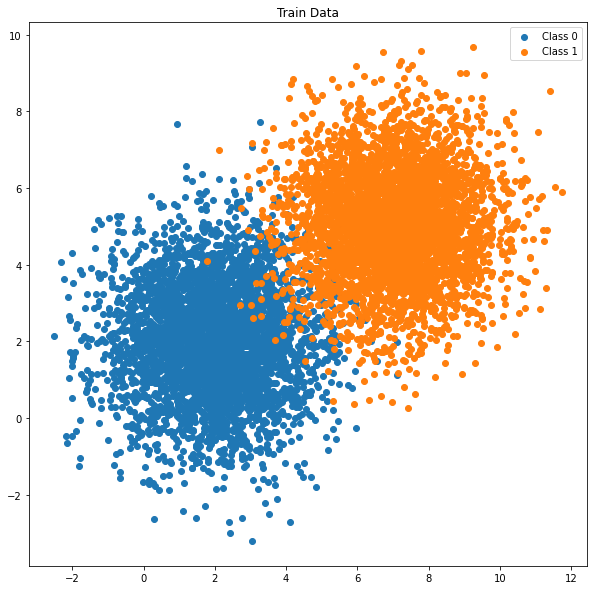

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(X_train[np.where(y_train==0),0], X_train[np.where(y_train==0),1])
plt.scatter(X_train[np.where(y_train==1),0], X_train[np.where(y_train==1),1])
plt.legend(['Class 0', 'Class 1'])
plt.title('Train Data')
plt.show()

From this chart, I can obeserve that the values of the dataset stay within the range (-2, 12) on the X axis and (4, 10) on the Y axis. Due to this insignificant distance's difference, I will not need to Scale the dataset.

## Create and Train the Model using SkLearn

The method of creating a Model and Train it using SkLearn is similar to Linear Regression in the Session 1.

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. Create the model
# 2. Call fit function on the Train Set
########## YOUR CODE HERE ############
sk_model = LogisticRegression()
sk_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Print out weights and bias of the model

In [ ]:
# TODO:
# 1. Dùng model.coef_ và intercept_ để lấy ra weight và bias
########## YOUR CODE HERE ############
print('Weights:', sk_model.coef_)
print('Bias:', sk_model.intercept_)

Weights: [[2.48272354 1.4412323 ]]
Bias: [-16.25357394]


Use the metric accuracy of SkLearn to check the performance of the model

In [ ]:
from sklearn.metrics import accuracy_score

# 1. Use the function of accuracy_score of SkLearn
# 2. Print the Accuracy of the model on the Test Set
# 3. Following the step with a random seed = 1612, the accuracy will be = 0.9745

print('Model accuracy:', accuracy_score(y_test,sk_model.predict(X_test)))

Model accuracy: 0.9745


Plot the Decision Boundary of the SkLearn Model

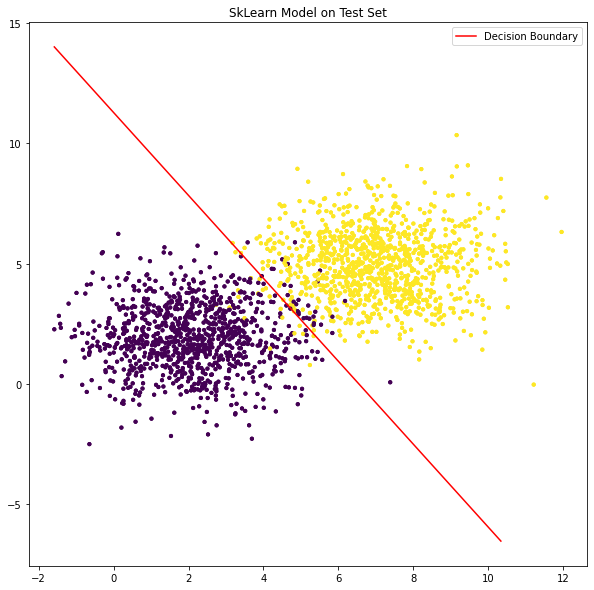

In [ ]:
def plot_decision_boundary(weights, bias, name):
  decision_x = [np.min(X_test[:,0]), np.max(X_test[:,1])]
  decision_y = - (bias + np.dot(np.expand_dims(decision_x, axis=1), weights[0])) / weights[1]
  plt.figure(figsize=(10,10))
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=10)
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=10)
  plt.plot(decision_x, decision_y, c='red')
  plt.legend(['Decision Boundary'])
  plt.title(name)
  plt.show()


def plot_decision_boundary_scaled(weights, bias, name):
  decision_x = [np.min(X_test_scaled[:,0]), np.max(X_test_scaled[:,1])]
  decision_y = - (bias + np.dot(np.expand_dims(decision_x, axis=1), weights[0])) / weights[1]
  plt.figure(figsize=(10,10))
  plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, s=10)
  plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, s=10)
  plt.plot(decision_x, decision_y, c='red')
  plt.legend(['Decision Boundary'])
  plt.title(name)
  plt.show()

plot_decision_boundary(np.squeeze(sk_model.coef_), np.squeeze(sk_model.intercept_), name='SkLearn Model on Test Set')

## Create and Train the Model using Keras

In this section, I will use Keras to create a Model.

The model in SkLearn is alreaedy packaged but in Keras, I have to create it myself and train it so the performance might be not good.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed
from tensorflow.keras.initializers import constant
set_seed(1612)

# 1. Create a model using Keras (Sequential and Dense)
# 2. Name the model after keras_model
# 2. Pay attention to the input_shape and activation
# 3. Compile the model with loss='binary_crossentropy', optimizer='adam', metrics='accuracy'
# 4. Use the command - fit on the Train Data set with epochs=5

# keras_model = _____()
# keras_model.add(Dense(_, activation=____, input_shape=(____)))

keras_model = Sequential()
keras_model.add(Dense(1, activation='sigmoid', kernel_initializer=constant(0) , input_shape=(X_train.shape[1:])))
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
keras_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.5410
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.6378
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7412
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8055
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8457
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8755
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.9005
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.9118
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3079 - accuracy: 0.9273
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2903 - accuracy: 0.9330

Change the epochs to see if the results of model can be improved.

Use function - evaluate to assess the model performance on the Test set

In [ ]:
# TODO:
# 1. Tìm cách dùng hàm evaluate bên dưới
keras_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 2.9485 - accuracy: 0.5005


[2.9485044479370117, 0.5005000233650208]

Use weights and bias found by keras_model to plot a decision boundary

In [ ]:
keras_model.weights

[<tf.Variable 'dense_10/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.6276065],
        [0.1630363]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(1,) dtype=float32, numpy=array([-2.907135], dtype=float32)>]

In [ ]:
keras_weights = keras_model.get_weights()[0]
keras_bias = keras_model.get_weights()[1]

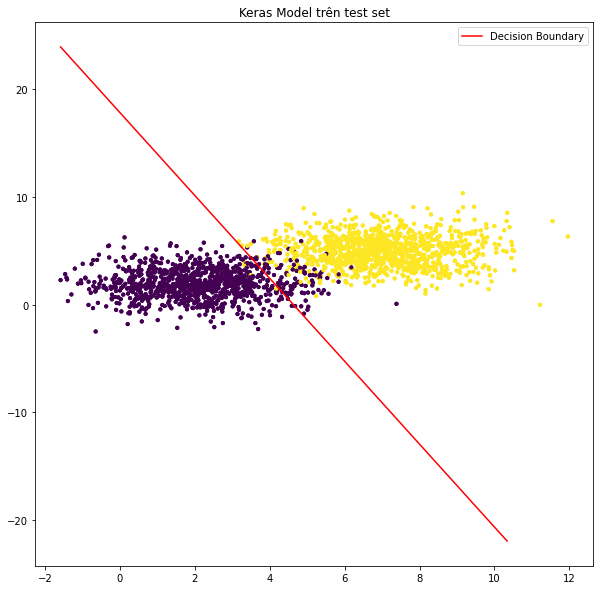

In [ ]:
plot_decision_boundary(np.squeeze(keras_weights), np.squeeze(keras_bias), name='Keras Model trên test set')

# Softmax Regression

In this section, I will use Softmax Regression for the classification with multiple classes

Dataset used here is the là Iris dataset.

The target is based on the sizes of Petal and Sepal to identify which flower belongs to Iris class (there are 3 clases).

## Prepare the dataset

In [ ]:
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
data = datasets.load_iris()
import numpy as np

X = data.data
y = data.target
Y = to_categorical(y, num_classes=3)
print('Shape of X:', X.shape)
print('Shape of y:', Y.shape)
print('Feature Names', data.feature_names)
print('Labels',data.target_names)

Shape of X: (150, 4)
Shape of y: (150, 3)
Feature Names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels ['setosa' 'versicolor' 'virginica']


Check the values of Min and Max of X to determine if I can scale the data or not

In [ ]:
print('Sepal Length min: {}, max: {}'.format(np.min(X[:,0]), np.max(X[:,0]))) 
print('Sepal Width min: {}, max: {}'.format(np.min(X[:,1]), np.max(X[:,1]))) 

print('Petal Length min: {}, max: {}'.format(np.min(X[:,2]), np.max(X[:,2]))) 
print('Petal Width min: {}, max: {}'.format(np.min(X[:,3]), np.max(X[:,3]))) 

Sepal Length min: 4.3, max: 7.9
Sepal Width min: 2.0, max: 4.4
Petal Length min: 1.0, max: 6.9
Petal Width min: 0.1, max: 2.5


Split the dataset into Train and Test

In [ ]:
# 1. Import libraries to split data into train and test
# 2. test_size=0.2, random_state=1612
# 3. Check shapes of both train và test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=1612, shuffle=True)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', Y_test.shape)

Shape of X_train: (120, 4)
Shape of y_train: (120, 3)
Shape of X_test: (30, 4)
Shape of y_test: (30, 3)


## Create amd Train the Model using Keras

In [ ]:
# 1. Create a model using Keras (Sequential and Dense)
# 2. Name the model after softmax_model
# 3. Check input_shape and activation
# 4. Check number of node of the layer Dense. For example, model.add(Dense(check the number of node, activation='', input_shape=()))
# 5. Compile the model with loss='categorical_crossentropy', optimizer='adam', metrics='accuracy'
# 6. Use the command - fit on the Train Data with optional epochs

# softmax_model = _____()
# softmax_model.add(Dense(3, activation='softmax', input_shape=(X_train.shape[1:])))
# softmax_model.compile(______)
# softmax_model.fit(___,___, epochs=_____, verbose=2)

softmax_model = Sequential()
softmax_model.add(Dense(3, activation='softmax', input_shape=(X_train.shape[1:])))
softmax_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
softmax_model.fit(X_train,Y_train, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.0497 - accuracy: 0.4417
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.0221 - accuracy: 0.4667
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.9965 - accuracy: 0.4917
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.9692 - accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.9443 - accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.9193 - accuracy: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8931 - accuracy: 0.5167
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8688 - accuracy: 0.5167
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8443 - accuracy: 0.5167
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8194 - accuracy: 0.5167
Epoch 11/1000
4/4 [

Use the function Evaluate to assess the performance of Model on the Test Set

In [ ]:
# 1. Assess the model
softmax_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.9667


[0.17551039159297943, 0.9666666388511658]